In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from dataset import Data, ResizeTransform
from gan import GeneratorNet, Discriminator, train
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import pandas as pd
from visualize import plot_batch, PlotLossCallback

%matplotlib notebook

Populating the interactive namespace from numpy and matplotlib


In [5]:
DATA_PATH = 'data/img_align_celeba'
BATCH_SIZE = 512
NUM_WORKERS = 1
Z_SIZE = 100
MODEL_PATH = 'model/'
LOAD_MODEL = False
LOAD_EPOCH_N = 60

In [3]:

transform = ResizeTransform(path='data')
data = Data(DATA_PATH, Z_SIZE, transform)
data_loader = DataLoader(data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, drop_last=True)
print('Dataset size: ', len(data))


Dataset size:  202599


In [17]:
df = pd.read_csv('data/list_attr_celeba.txt', sep='\s+', header=1)
print(list(df))
df[['Male', 'Smiling', 'Young', 'Mustache', 'Bald', 'Eyeglasses', 'Wearing_Hat']].head(10)

df_bb = pd.read_csv(str('data/list_bbox_celeba.txt'), sep='\s+', header=1)
df_bb.head()

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [4]:
generator = GeneratorNet(Z_SIZE).cuda()
discriminator = Discriminator().cuda()

In [6]:
if LOAD_MODEL:
    generator.load_state_dict(torch.load(MODEL_PATH + 'generator_%d.pth' % (LOAD_EPOCH_N,)))
    discriminator.load_state_dict(torch.load(MODEL_PATH + 'discriminator_%d.pth' % (LOAD_EPOCH_N,)))

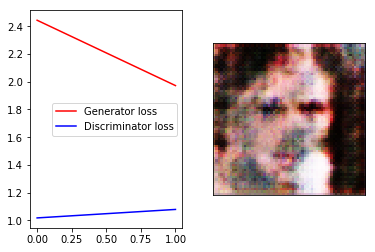

In [ ]:
callback = PlotLossCallback(generator, discriminator)
train(generator, discriminator, data_loader, 100, k=2, callback_func=callback)


In [10]:

#print(Z)

tensor([[ 1.8307, -0.2602, -1.7820, -0.9923,  0.3051,  0.8523,  0.1468,
         -1.6428, -0.1286, -1.1731, -2.5091, -0.4575,  0.1769,  1.3189,
         -1.0830,  0.8586, -0.0031,  1.2339, -0.0026, -0.1130, -1.5624,
          0.8822, -1.2263,  0.4550, -2.0632,  0.4783, -2.7451,  0.9911,
         -0.3107, -1.6872, -0.2557,  0.9607, -0.8107, -0.8012, -2.2284,
          0.0102,  0.7794, -0.9828,  0.3473,  0.4681, -0.7351,  1.0933,
         -0.0636, -0.1289,  1.7876,  0.0795, -1.0996,  1.2146,  0.9892,
         -1.2441,  0.2528, -0.8565,  0.6095,  0.4950,  0.5277, -1.7238,
         -1.8258,  0.3929,  0.0484,  2.5564,  0.4598,  0.0592, -2.5452,
          0.7219, -0.1022,  0.4436, -0.5843, -0.3153, -0.6031, -1.2584,
         -0.1151, -0.2073, -2.2004,  1.5587,  2.2979,  0.5019,  0.4290,
          0.1358,  0.8879, -1.2404, -0.6883,  1.4252,  0.3508, -0.0374,
         -1.9984, -0.3522,  0.2310, -0.4234, -1.9883,  1.9122, -0.9175,
          2.0863,  1.4500, -1.0468, -0.7860,  1.6368, -0.3341,  

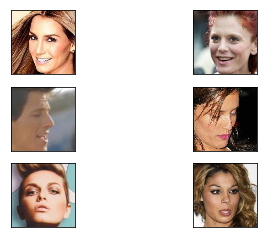

In [7]:
for batch, Z in data_loader:
    plot_batch(batch.data.cpu().numpy(), limit=6)
    break

[[-0.19451168  0.14324933  0.03484679 ... -0.2019099  -0.21829559
  -0.19240896]]


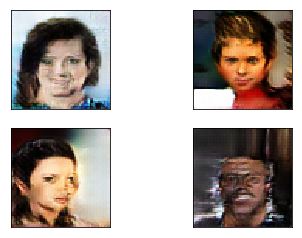

In [20]:
Z = torch.normal(mean=torch.zeros(4, generator.z_size)).cuda()
G_sample = generator(Z)
sample = G_sample.data.cpu().numpy()
print(discriminator.layer4.weight.cpu().detach().numpy())
plot_batch(G_sample.data.cpu().numpy())

In [15]:
w = generator.layer3[0].weight.data.cpu().numpy()
print(w)

[[[[-0.01027547  0.01780988  0.0203546 ]
   [-0.02127965 -0.03737152 -0.06242351]
   [-0.01233344  0.01474136 -0.05660687]]

  [[ 0.04500119 -0.00040754 -0.03810833]
   [ 0.05126438 -0.04767402 -0.01762823]
   [ 0.00242352  0.0075685  -0.00591222]]

  [[ 0.02876679  0.03748034  0.0490016 ]
   [-0.03277855 -0.01212149 -0.00138975]
   [ 0.01242152 -0.02329018  0.04519126]]

  ...

  [[ 0.02787746 -0.00585565  0.03187378]
   [ 0.0268486   0.02464525 -0.03410755]
   [ 0.02920406  0.00992341 -0.01345651]]

  [[ 0.01272131  0.02954702 -0.01325853]
   [ 0.02916796 -0.01813735 -0.01847449]
   [ 0.05685608  0.03069197 -0.00204189]]

  [[-0.03487587 -0.05307901 -0.02535835]
   [-0.00035182 -0.02398503  0.02842312]
   [ 0.0568269   0.04239583  0.07403616]]]


 [[[ 0.02138911  0.02461311  0.00166562]
   [ 0.05640188 -0.0061517  -0.00764683]
   [-0.00049296  0.01933037 -0.00836099]]

  [[ 0.04931742 -0.01573188 -0.03013059]
   [ 0.03041697 -0.04847722  0.02377255]
   [ 0.01542802 -0.03941106 -0.012

In [ ]:
for batch, Z in data_loader:
    X = batch.cuda()
    Z = Z.cuda()
    G_sample = generator(Z)
    D_real, D_logit_real = discriminator(X)
    D_fake, D_logit_fake = discriminator(G_sample)
    print('D_real', D_real,'\n', 'D_fake', D_fake)
    print('D_logit_real', D_logit_real, '\n', 'D_logit_fake', D_logit_fake)
    break
    